<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

In [1]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib: Basic Plotting, part 2


Relationship between GDP and CO2 Emissions in USA

In [4]:
data = pd.read_csv("Indicators.csv")

In [5]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


SELECT GDP per capita emissions for the United State

In [11]:
#SELECT GDP per capita emissions for the United State
hist_indicator = 'GDP per capita \(constant 2005'
hist_country   = 'USA'
mask1 = data["IndicatorName"].str.contains(hist_indicator)
mask2 = data["CountryCode"].str.contains(hist_country)

#stage is just those indicators matching the USA for country code and
gdp_stage= data[mask1 & mask2]

SELECT CO2 Emissions per capita emissions for the United State

In [7]:
#set up 2 masks
hist_idicator =  "CO2 emissions \(metric"
hist_country= "USA"

mask1 = data["IndicatorName"].str.contains(hist_idicator)
mask2 = data["CountryCode"].str.contains(hist_country)

#State is just those indicators matching the USA for country code  an
stage = data[mask1 & mask2]

In [12]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [15]:
gdp_stage.shape

(55, 6)

In [16]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [17]:
stage.shape

(52, 6)

before we plot these against each other, let's first look at the trend
in GDP per capita for the U.S.

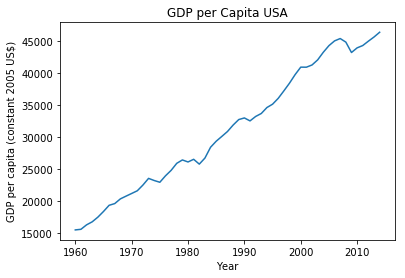

In [28]:
#switch to a line plot 
plt.plot(gdp_stage['Year'].values,gdp_stage["Value"].values)

#LAbel
plt.xlabel("Year")
plt.ylabel(gdp_stage["IndicatorName"].iloc[0])
#:LAbel the figure
plt.title("GDP per Capita USA")

#to make more honest, start they y axis at 0
# plt.axis([1959,2011,0,30])

plt.show()

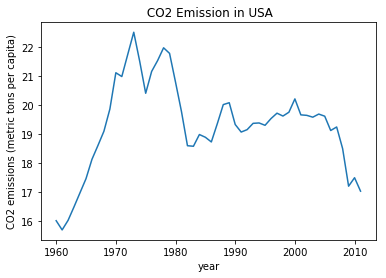

In [30]:
# get the years
years = stage["Year"].values
# get the values
co2= stage["Value"].values
plt.plot(years,co2)
plt.xlabel("year")
plt.ylabel(stage["IndicatorName"].iloc[2])
plt.title(" CO2 Emission in USA")

So although we've seen a decline in CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

# ScatterPlot for comparing GDP against CO2 emissions (per capita) 

First, we'll need to make sure we're looking at the same time frames

In [36]:
print("GDP Min Year=",gdp_stage["Year"].min(),"\nGDP Max Year=",gdp_stage["Year"].max())
print("CO2 Emissions Min Year=",stage["Year"].min(),"\nCO2 Emissions  Max Year=",stage["Year"].max())

GDP Min Year= 1960 
GDP Max Year= 2014
CO2 Emissions Min Year= 1960 
CO2 Emissions  Max Year= 2011


-------------------------------------------------------------
Opps, there is a little bit problem here

GPD max & CO2 Emissions max does not match

We ave extra 3 years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare(this is actually requred by scatterplot)

In [39]:
gdp_stage_trunc = gdp_stage[gdp_stage["Year"] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


Alright! now everything is totally okay to make plot

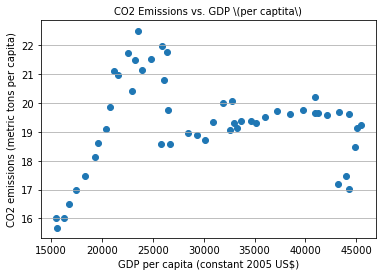

In [42]:
fig,axis = plt.subplots()
# grid lines, Xtricks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title("CO2 Emissions vs. GDP \(per captita\)",fontsize=10)
axis.set_xlabel(gdp_stage_trunc["IndicatorName"].iloc[0],fontsize=10)
axis.set_ylabel(stage["IndicatorName"].iloc[0],fontsize=10)
# Most the rest should be fairly recognizable except for the calls and method scatter.
# To create a scatter plot with these two arrays.
X=gdp_stage_trunc["Value"]
Y=stage["Value"]
axis.scatter(X,Y)
plt.show()

Lol, it's pretty weak relationship.

after that there doesn't seem to be much of a relationship at all.

----------------------------------------------------------------


We could also test this using correlation.

I'll use the correlation coefficient function in Numpy to get back the relationship
between these two arrays.

In [43]:
np.corrcoef(gdp_stage_trunc["Value"],stage["Value"])


array([[ 1.        ,  0.07676005],
       [ 0.07676005,  1.        ]])